In [41]:
import numpy as np
import pandas as pd


df = pd.read_json('//kaggle/input/cars-rus-china/autosender_part_150.json')
df.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Марка,Модель,Год выпуска,Цена в г.Владивосток,Цена на аукционе,Двигатель,Мощность,Коробка передач,Пробег,Цвет,URL,Дата публикации
0,Foton,"View механика, 2021, 5800",2021,1816824₽,49 500 ¥,2400 см³,NaN,механика,5800 км,белый,https://autosender.ru/avto-iz-kitaya/foton/vie...,03.07.2025
1,Buick,"GL8 автомат, 2021, 6100",2021,1816824₽,189 800 ¥,2000 см³,NaN,автомат,6100 км,золотой,https://autosender.ru/avto-iz-kitaya/buick/gl8...,03.07.2025
2,TANK,"300 автомат, 2024, 4200",2024,1816824₽,179 000 ¥,2000 см³,NaN,автомат,4200 км,черный,https://autosender.ru/avto-iz-kitaya/tank/300/...,03.07.2025
3,BMW,"5er автомат, 2014, 29780",2014,1816824₽,86 800 ¥,2000 см³,NaN,автомат,29780 км,белый,https://autosender.ru/avto-iz-kitaya/bmw/5er/1...,03.07.2025
4,BMW,"X5 автомат, 2014, 28000",2014,1816824₽,108 000 ¥,3000 см³,NaN,автомат,28000 км,коричневый,https://autosender.ru/avto-iz-kitaya/bmw/x5/19...,03.07.2025


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7392 entries, 0 to 7391
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Марка                 7392 non-null   object 
 1   Модель                7392 non-null   object 
 2   Год выпуска           7392 non-null   int64  
 3   Цена в г.Владивосток  7392 non-null   object 
 4   Цена на аукционе      7392 non-null   object 
 5   Двигатель             7392 non-null   object 
 6   Мощность              0 non-null      float64
 7   Коробка передач       6824 non-null   object 
 8   Пробег                7391 non-null   object 
 9   Цвет                  7202 non-null   object 
 10  URL                   7392 non-null   object 
 11  Дата публикации       7392 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 693.1+ KB


In [43]:
df = df.dropna(subset=["Марка", "Модель", "Год выпуска", "Цена в г.Владивосток", "Пробег", "Цена на аукционе"])

df["Двигатель"] = df["Двигатель"].fillna(2000)
df["Цвет"] = df["Цвет"].fillna("не указано")
df["Коробка передач"] = df["Коробка передач"].fillna("не указано")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7391 entries, 0 to 7391
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Марка                 7391 non-null   object 
 1   Модель                7391 non-null   object 
 2   Год выпуска           7391 non-null   int64  
 3   Цена в г.Владивосток  7391 non-null   object 
 4   Цена на аукционе      7391 non-null   object 
 5   Двигатель             7391 non-null   object 
 6   Мощность              0 non-null      float64
 7   Коробка передач       7391 non-null   object 
 8   Пробег                7391 non-null   object 
 9   Цвет                  7391 non-null   object 
 10  URL                   7391 non-null   object 
 11  Дата публикации       7391 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 750.6+ KB


In [45]:
def clean_price(price_str):
    """Преобразует '1 940 000₽' в 1940000"""
    if pd.isna(price_str):
        return np.nan
    cleaned = price_str.replace(" ", "").replace("\xa0", "").replace("₽", "").replace("¥", "")
    return int(cleaned)

def clean_mileage(mileage_str):
    """Преобразует пробег в числовое значение, обрабатывая различные форматы"""
    if pd.isna(mileage_str):
        return np.nan
    
    cleaned = ''.join(c for c in mileage_str if c.isdigit() or c == ',')
    cleaned = cleaned.replace(',', '')
    
    if not cleaned:
        return 0
    
    try:
        return int(cleaned)
    except ValueError:
        return np.nan

def clean_power(power_str):
    """Извлекает число из мощности"""
    if pd.isna(power_str):
        return np.nan
    
    import re
    match = re.search(r'(\d+)', power_str)
    if match:
        return int(match.group(1))
    return np.nan


df["Цена в г.Владивосток"] = df["Цена в г.Владивосток"].apply(clean_price)
df["Цена на аукционе"] = df["Цена на аукционе"].apply(clean_price)
df["Пробег"] = df["Пробег"].apply(clean_mileage)
df["Двигатель"] = df["Двигатель"].apply(clean_power)
df.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Марка,Модель,Год выпуска,Цена в г.Владивосток,Цена на аукционе,Двигатель,Мощность,Коробка передач,Пробег,Цвет,URL,Дата публикации
0,Foton,"View механика, 2021, 5800",2021,1816824,49500,2400,NaN,механика,5800,белый,https://autosender.ru/avto-iz-kitaya/foton/vie...,03.07.2025
1,Buick,"GL8 автомат, 2021, 6100",2021,1816824,189800,2000,NaN,автомат,6100,золотой,https://autosender.ru/avto-iz-kitaya/buick/gl8...,03.07.2025
2,TANK,"300 автомат, 2024, 4200",2024,1816824,179000,2000,NaN,автомат,4200,черный,https://autosender.ru/avto-iz-kitaya/tank/300/...,03.07.2025
3,BMW,"5er автомат, 2014, 29780",2014,1816824,86800,2000,NaN,автомат,29780,белый,https://autosender.ru/avto-iz-kitaya/bmw/5er/1...,03.07.2025
4,BMW,"X5 автомат, 2014, 28000",2014,1816824,108000,3000,NaN,автомат,28000,коричневый,https://autosender.ru/avto-iz-kitaya/bmw/x5/19...,03.07.2025


In [46]:
df['Год выпуска'] = pd.to_numeric(df['Год выпуска'], errors='coerce').fillna(0).astype(int)
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Марка,Модель,Год выпуска,Цена в г.Владивосток,Цена на аукционе,Двигатель,Мощность,Коробка передач,Пробег,Цвет,URL,Дата публикации
0,Foton,"View механика, 2021, 5800",2021,1816824,49500,2400,NaN,механика,5800,белый,https://autosender.ru/avto-iz-kitaya/foton/vie...,03.07.2025
1,Buick,"GL8 автомат, 2021, 6100",2021,1816824,189800,2000,NaN,автомат,6100,золотой,https://autosender.ru/avto-iz-kitaya/buick/gl8...,03.07.2025
2,TANK,"300 автомат, 2024, 4200",2024,1816824,179000,2000,NaN,автомат,4200,черный,https://autosender.ru/avto-iz-kitaya/tank/300/...,03.07.2025
3,BMW,"5er автомат, 2014, 29780",2014,1816824,86800,2000,NaN,автомат,29780,белый,https://autosender.ru/avto-iz-kitaya/bmw/5er/1...,03.07.2025
4,BMW,"X5 автомат, 2014, 28000",2014,1816824,108000,3000,NaN,автомат,28000,коричневый,https://autosender.ru/avto-iz-kitaya/bmw/x5/19...,03.07.2025


In [47]:
import numpy as np
import pandas as pd
import re

df["Возраст"] = 2025 - df["Год выпуска"]
df.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Марка,Модель,Год выпуска,Цена в г.Владивосток,Цена на аукционе,Двигатель,Мощность,Коробка передач,Пробег,Цвет,URL,Дата публикации,Возраст
0,Foton,"View механика, 2021, 5800",2021,1816824,49500,2400,NaN,механика,5800,белый,https://autosender.ru/avto-iz-kitaya/foton/vie...,03.07.2025,4
1,Buick,"GL8 автомат, 2021, 6100",2021,1816824,189800,2000,NaN,автомат,6100,золотой,https://autosender.ru/avto-iz-kitaya/buick/gl8...,03.07.2025,4
2,TANK,"300 автомат, 2024, 4200",2024,1816824,179000,2000,NaN,автомат,4200,черный,https://autosender.ru/avto-iz-kitaya/tank/300/...,03.07.2025,1
3,BMW,"5er автомат, 2014, 29780",2014,1816824,86800,2000,NaN,автомат,29780,белый,https://autosender.ru/avto-iz-kitaya/bmw/5er/1...,03.07.2025,11
4,BMW,"X5 автомат, 2014, 28000",2014,1816824,108000,3000,NaN,автомат,28000,коричневый,https://autosender.ru/avto-iz-kitaya/bmw/x5/19...,03.07.2025,11


In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split


le_make = LabelEncoder()
le_model = LabelEncoder()
df['Марка_код'] = le_make.fit_transform(df['Марка'])
df['Модель_код'] = le_model.fit_transform(df['Модель'])

cat_cols = ['Коробка передач', 'Цвет']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df['Новый'] = (df['Пробег'] < 1000).astype(int)
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Марка,Модель,Год выпуска,Цена в г.Владивосток,Цена на аукционе,Двигатель,Мощность,Пробег,URL,Дата публикации,...,Цвет_коричневый,Цвет_не указано,Цвет_оранжевый,Цвет_розовый,Цвет_серебристый,Цвет_серый,Цвет_синий,Цвет_фиолетовый,Цвет_черный,Новый
0,Foton,"View механика, 2021, 5800",2021,1816824,49500,2400,NaN,5800,https://autosender.ru/avto-iz-kitaya/foton/vie...,03.07.2025,...,False,False,False,False,False,False,False,False,False,0
1,Buick,"GL8 автомат, 2021, 6100",2021,1816824,189800,2000,NaN,6100,https://autosender.ru/avto-iz-kitaya/buick/gl8...,03.07.2025,...,False,False,False,False,False,False,False,False,False,0
2,TANK,"300 автомат, 2024, 4200",2024,1816824,179000,2000,NaN,4200,https://autosender.ru/avto-iz-kitaya/tank/300/...,03.07.2025,...,False,False,False,False,False,False,False,False,True,0
3,BMW,"5er автомат, 2014, 29780",2014,1816824,86800,2000,NaN,29780,https://autosender.ru/avto-iz-kitaya/bmw/5er/1...,03.07.2025,...,False,False,False,False,False,False,False,False,False,0
4,BMW,"X5 автомат, 2014, 28000",2014,1816824,108000,3000,NaN,28000,https://autosender.ru/avto-iz-kitaya/bmw/x5/19...,03.07.2025,...,True,False,False,False,False,False,False,False,False,0


In [49]:
from datetime import datetime

def preprocess_dates(df, date_col):
    df[date_col] = pd.to_datetime(df[date_col])
    
    df['год'] = df[date_col].dt.year
    df['месяц'] = df[date_col].dt.month
    df['день'] = df[date_col].dt.day
    df['день_недели'] = df[date_col].dt.dayofweek
    df['квартал'] = df[date_col].dt.quarter
    df['день_года'] = df[date_col].dt.dayofyear
    
    df['викенд'] = (df[date_col].dt.dayofweek >= 5).astype(int)
    df['сезон'] = (df[date_col].dt.month % 12 // 3 + 1)

    current_date = datetime.now()
    df['дней_с_публикации'] = (current_date - df[date_col]).dt.days
    
    return df.drop(columns=[date_col])

df = preprocess_dates(df, 'Дата публикации')
df.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Марка,Модель,Год выпуска,Цена в г.Владивосток,Цена на аукционе,Двигатель,Мощность,Пробег,URL,Возраст,...,Новый,год,месяц,день,день_недели,квартал,день_года,викенд,сезон,дней_с_публикации
0,Foton,"View механика, 2021, 5800",2021,1816824,49500,2400,NaN,5800,https://autosender.ru/avto-iz-kitaya/foton/vie...,4,...,0,2025,3,7,4,1,66,0,2,125
1,Buick,"GL8 автомат, 2021, 6100",2021,1816824,189800,2000,NaN,6100,https://autosender.ru/avto-iz-kitaya/buick/gl8...,4,...,0,2025,3,7,4,1,66,0,2,125
2,TANK,"300 автомат, 2024, 4200",2024,1816824,179000,2000,NaN,4200,https://autosender.ru/avto-iz-kitaya/tank/300/...,1,...,0,2025,3,7,4,1,66,0,2,125
3,BMW,"5er автомат, 2014, 29780",2014,1816824,86800,2000,NaN,29780,https://autosender.ru/avto-iz-kitaya/bmw/5er/1...,11,...,0,2025,3,7,4,1,66,0,2,125
4,BMW,"X5 автомат, 2014, 28000",2014,1816824,108000,3000,NaN,28000,https://autosender.ru/avto-iz-kitaya/bmw/x5/19...,11,...,0,2025,3,7,4,1,66,0,2,125


In [50]:
df['Цена на аукционе']=df['Цена на аукционе'].apply(lambda x: int(x*10.85))
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Марка,Модель,Год выпуска,Цена в г.Владивосток,Цена на аукционе,Двигатель,Мощность,Пробег,URL,Возраст,...,Новый,год,месяц,день,день_недели,квартал,день_года,викенд,сезон,дней_с_публикации
0,Foton,"View механика, 2021, 5800",2021,1816824,537075,2400,NaN,5800,https://autosender.ru/avto-iz-kitaya/foton/vie...,4,...,0,2025,3,7,4,1,66,0,2,125
1,Buick,"GL8 автомат, 2021, 6100",2021,1816824,2059330,2000,NaN,6100,https://autosender.ru/avto-iz-kitaya/buick/gl8...,4,...,0,2025,3,7,4,1,66,0,2,125
2,TANK,"300 автомат, 2024, 4200",2024,1816824,1942150,2000,NaN,4200,https://autosender.ru/avto-iz-kitaya/tank/300/...,1,...,0,2025,3,7,4,1,66,0,2,125
3,BMW,"5er автомат, 2014, 29780",2014,1816824,941780,2000,NaN,29780,https://autosender.ru/avto-iz-kitaya/bmw/5er/1...,11,...,0,2025,3,7,4,1,66,0,2,125
4,BMW,"X5 автомат, 2014, 28000",2014,1816824,1171800,3000,NaN,28000,https://autosender.ru/avto-iz-kitaya/bmw/x5/19...,11,...,0,2025,3,7,4,1,66,0,2,125


In [51]:
df.columns

Index(['Марка', 'Модель', 'Год выпуска', 'Цена в г.Владивосток',
       'Цена на аукционе', 'Двигатель', 'Мощность', 'Пробег', 'URL', 'Возраст',
       'Марка_код', 'Модель_код', 'Коробка передач_механика',
       'Коробка передач_не указано', 'Цвет_желтый', 'Цвет_зеленый',
       'Цвет_золотой', 'Цвет_коричневый', 'Цвет_не указано', 'Цвет_оранжевый',
       'Цвет_розовый', 'Цвет_серебристый', 'Цвет_серый', 'Цвет_синий',
       'Цвет_фиолетовый', 'Цвет_черный', 'Новый', 'год', 'месяц', 'день',
       'день_недели', 'квартал', 'день_года', 'викенд', 'сезон',
       'дней_с_публикации'],
      dtype='object')

In [52]:
features = ['Год выпуска', 'Двигатель', 'Пробег',
       'Возраст', 'Марка_код', 'Модель_код', 'Коробка передач_механика',
       'Коробка передач_не указано', 'Цвет_желтый', 'Цвет_зеленый',
       'Цвет_золотой', 'Цвет_коричневый', 'Цвет_не указано', 'Цвет_оранжевый',
       'Цвет_розовый', 'Цвет_серебристый', 'Цвет_серый', 'Цвет_синий',
       'Цвет_фиолетовый', 'Цвет_черный', 'Новый', 'год', 'месяц', 'день',
       'день_недели', 'квартал', 'день_года', 'викенд', 'сезон',
       'дней_с_публикации']

target = 'Цена на аукционе'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import joblib
joblib.dump(le_make, 'le_make.pkl')
joblib.dump(le_model, 'le_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (5912, 30)
Размер тестовой выборки: (1479, 30)


In [54]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

base_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"MAE: {mae:.2f} ₽")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f} ₽")
print(f"R² Score: {r2:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Лучшие параметры: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
MAE: 442679.20 ₽
MSE: 1355122227735.33
RMSE: 1164097.17 ₽
R² Score: 0.8622


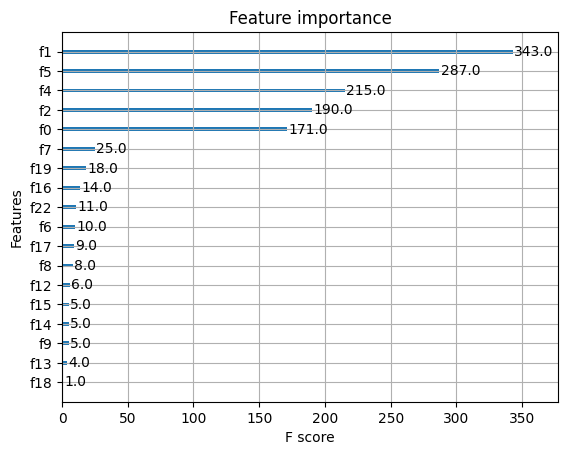

In [55]:
import matplotlib.pyplot as plt

xgb.plot_importance(best_model)
plt.show()

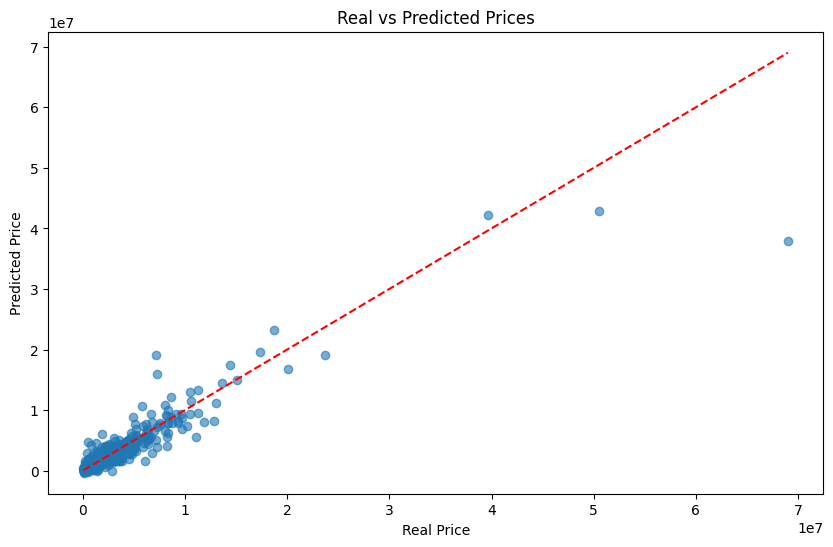

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Real vs Predicted Prices')
plt.show()

In [57]:
import pickle

with open("china_cars_best_model.pkl", "wb") as f:
    pickle.dump(grid_search, f)